In [1]:
%env cfx5pre=/opt/dist/ansys_inc/v202/CFX/bin/cfx5pre
%env cfx5cmds=/opt/dist/ansys_inc/v202/CFX/bin/cfx5cmds
%env cfx5mondata=/opt/dist/ansys_inc/v202/CFX/bin/cfx5mondata

env: cfx5pre=/opt/dist/ansys_inc/v202/CFX/bin/cfx5pre
env: cfx5cmds=/opt/dist/ansys_inc/v202/CFX/bin/cfx5cmds
env: cfx5mondata=/opt/dist/ansys_inc/v202/CFX/bin/cfx5mondata


In [2]:
from h5rdmtoolbox import x2hdf

In [4]:
if False:
    hdf_filename = x2hdf.cfx2hdf('/home/ws/ht72/AnsysCFX/openCeFaDB/unstruct_mesh/mesh1/sst/n600/sst/V00100/V00100_m1_sst_resmax1e-3.cfx', None)
else:
    hdf_filename = '/home/ws/ht72/AnsysCFX/openCeFaDB/unstruct_mesh/mesh1/sst/n600/sst/V00100/V00100_m1_sst_resmax1e-3.hdf'

In [5]:
hdf_filename

'/home/ws/ht72/AnsysCFX/openCeFaDB/unstruct_mesh/mesh1/sst/n600/sst/V00100/V00100_m1_sst_resmax1e-3.hdf'

In [6]:
from h5rdmtoolbox.h5wrapper import H5CFD

/home/ws/ht72/GitHub/h5RDMtoolbox/h5rdmtoolbox/h5wrapper/h5piv.py:675: SpecialDatasetRegistrationWarning: registration of accessor <class 'h5rdmtoolbox.h5wrapper.h5piv.PIVDisplacementDataset'> under name 'DisplacementVector' for type <class 'h5rdmtoolbox.h5wrapper.h5piv.H5PIVGroup'> is overriding a preexisting attribute with the same name.
  class PIVDisplacementDataset(DisplacementDataset):


In [9]:
with H5Flow(hdf_filename) as h5:
    h5.dump()
    p = h5.monitor.USER_POINT.MP18.STATOR.Pressure[:]

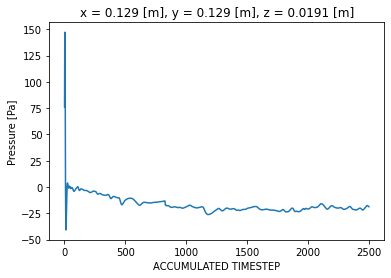

In [14]:
p[0:2500].plot()